<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# Проект «Анализ вакансий из HeadHunter»
   

In [ ]:
!pip install psycopg2

In [ ]:
import pandas as pd
import psycopg2

In [ ]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python
DBNAME = ''
USER = ''
PASSWORD = ''
HOST = ''
PORT =

In [ ]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

## 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в базе (вакансии находятся в таблице `vacancies`).

In [ ]:
# текст запроса
query_3_1 = f'''
SELECT COUNT(*) as cnt_vacancies
FROM public.vacancies;
'''

In [ ]:
# результат запроса

df = pd.read_sql_query(query_3_1, connection)
print(f"Количество вакансий в базе: {df['cnt_vacancies'][0]}")

/tmp/ipython-input-1732863653.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


Количество вакансий в базе: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица `employers`).

In [ ]:
# текст запроса
query_3_2 = f'''
SELECT COUNT(*) as cnt_employers
FROM public.employers;
'''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
print(f"Количество работодателей: {df['cnt_employers'][0]}")

Количество работодателей: 23501


/tmp/ipython-input-1635408310.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


3. Посчитайте с помощью запроса количество регионов (таблица `areas`).

In [ ]:
# текст запроса
query_3_3 = f'''
SELECT COUNT(*) as cnt_areas
FROM public.areas;
'''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
print(f"Количество регионов: {df['cnt_areas'][0]}")

Количество регионов: 1362


/tmp/ipython-input-825420533.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


4. Посчитайте с помощью запроса количество сфер деятельности в базе (таблица `industries`).

In [ ]:
# текст запроса
query_3_4 = f'''
SELECT COUNT(*) as cnt_industries
FROM public.industries;
'''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
print(f"Количество сфер деятельности: {df['cnt_industries'][0]}")

Количество сфер деятельности: 294


/tmp/ipython-input-2886427280.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


***

## Выводы по предварительному анализу данных

На основе предварительного анализа данных можно сделать следующие выводы. В базе представлено 49 197 вакансий от 23 501 работодателя, что указывает на достаточно активный рынок труда с широким выбором компаний. Географический охват значителен - 1 362 региона, что говорит о распределённости вакансий по разным городам и странам, возможно, включая удалённые форматы работы. Наличие 294 сфер деятельности демонстрирует разнообразие индустрий, заинтересованных в найме специалистов, при этом IT-сфера, вероятно, доминирует, но данные также включают смежные области. Общее соотношение вакансий к работодателям (примерно 2:1) показывает, что в среднем каждый работодатель размещает около двух вакансий, что может свидетельствовать как о разовой потребности в найме, так и о более масштабных проектах у крупных компаний.

## 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (`cnt`) вакансий в каждом регионе (`area`).
Отсортируйте по количеству вакансий в порядке убывания.

In [ ]:
# текст запроса
query_4_1 = """
SELECT
a.name AS region,
COUNT(*) AS cnt
FROM public.vacancies v
JOIN public.areas a ON v.area_id = a.id
GROUP BY a.id, a.name
ORDER BY cnt DESC;
"""

In [ ]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
print("Топ-10 регионов по количеству вакансий:")
print(df.head(5))

/tmp/ipython-input-237903812.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1, connection)


Топ-10 регионов по количеству вакансий:
            region   cnt
0           Москва  5333
1  Санкт-Петербург  2851
2            Минск  2112
3      Новосибирск  2006
4           Алматы  1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [ ]:
# текст запроса
query_4_2 = """
SELECT COUNT(*) as cnt_with_salary
FROM public.vacancies
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL;
"""

In [ ]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
print(f"Количество вакансий с заполненной хотя бы одной зарплатной границей: {df['cnt_with_salary'][0]}")

Количество вакансий с заполненной хотя бы одной зарплатной границей: 24073


/tmp/ipython-input-2170701831.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до **целого числа**.

In [ ]:
# текст запроса
query_4_3 = """
SELECT
ROUND(AVG(salary_from)) as avg_salary_from,
ROUND(AVG(salary_to)) as avg_salary_to
FROM public.vacancies
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL;
"""

In [ ]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
print(f"Средняя нижняя граница зарплаты: {df['avg_salary_from'][0]}")
print(f"Средняя верхняя граница зарплаты: {df['avg_salary_to'][0]}")

Средняя нижняя граница зарплаты: 71065.0
Средняя верхняя граница зарплаты: 110537.0


/tmp/ipython-input-3121756679.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (`schedule`) и типа трудоустройства (`employment`), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [ ]:
# текст запроса
query_4_4 = """
SELECT
schedule,
employment,
COUNT(*) as cnt
FROM public.vacancies
GROUP BY schedule, employment
ORDER BY cnt DESC;
"""

In [ ]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
print("Количество вакансий по сочетаниям графика и типа трудоустройства:")
print(df.head(5)) # Покажем топ-5 сочетаний

Количество вакансий по сочетаниям графика и типа трудоустройства:
           schedule           employment    cnt
0       Полный день     Полная занятость  35367
1  Удаленная работа     Полная занятость   7802
2     Гибкий график     Полная занятость   1593
3  Удаленная работа  Частичная занятость   1312
4    Сменный график     Полная занятость    940


/tmp/ipython-input-4243781237.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4, connection)


5. Напишите запрос, выводящий значения поля «Требуемый опыт работы» (`experience`) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [ ]:
# текст запроса
query_4_5 = """
SELECT
experience,
COUNT(*) as cnt
FROM public.vacancies
GROUP BY experience
ORDER BY cnt;
"""

In [ ]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
print("Опыт работы в порядке возрастания количества вакансий:")
print(df)

Опыт работы в порядке возрастания количества вакансий:
           experience    cnt
0         Более 6 лет   1337
1           Нет опыта   7197
2       От 3 до 6 лет  14511
3  От 1 года до 3 лет  26152


/tmp/ipython-input-3881047057.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_5, connection)


***

## Выводы по детальному анализу вакансий

Анализируя данные по вакансиям, можно отметить несколько ключевых тенденций. Географическое распределение демонстрирует ярко выраженную концентрацию рынка труда в крупнейших городах: Москва лидирует с 5333 вакансиями, за ней следуют Санкт-Петербург, Минск, Новосибирск и Алматы, что подтверждает статус этих городов как основных ИТ-хабов. Интересно, что лишь около половины вакансий (24 073 из 49 197) содержат информацию о зарплате, что говорит о недостаточной прозрачности условий оплаты труда со стороны работодателей. Средняя вилка зарплат составляет от 71 000 до 110 000 рублей, при этом верхняя граница значительно выше нижней, что указывает на возможность роста дохода в зависимости от квалификации и условий работы. Преобладающим форматом работы остаётся полный день с полной занятостью (35 367 вакансий), однако удалённый формат также набирает популярность, занимая второе место с 7802 вакансиями. Рынок наиболее активно ищет специалистов с опытом от 1 до 3 лет (26 152 вакансии), в то время как вакансий для топовых экспертов с опытом более 6 лет значительно меньше (1337), что может свидетельствовать как о меньшем спросе на таких специалистов, так и о более специфическом характере этих позиций.

## 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [ ]:
# текст запроса
query_5_1 = """
WITH employer_vacancies AS (
    SELECT
        e.name AS employer_name,
        COUNT(*) AS vacancy_count,
        ROW_NUMBER() OVER (ORDER BY COUNT(*) DESC) AS rank
    FROM public.vacancies v
    JOIN public.employers e ON v.employer_id = e.id
    GROUP BY e.id, e.name
)
SELECT
    employer_name,
    vacancy_count
FROM employer_vacancies
WHERE rank = 1 OR rank = 5
ORDER BY rank;
"""

In [ ]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
print("Работодатели на 1-м и 5-м месте по количеству вакансий:")
print(df)

/tmp/ipython-input-2928852837.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1, connection)


Работодатели на 1-м и 5-м месте по количеству вакансий:
   employer_name  vacancy_count
0         Яндекс           1933
1  Газпром нефть            331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [ ]:
# текст запроса
query_5_2 = """
SELECT
    a.name AS region,
    COUNT(DISTINCT e.id) AS employers_count,
    COUNT(DISTINCT v.id) AS vacancies_count
FROM public.areas a
LEFT JOIN public.employers e ON a.id = e.area
LEFT JOIN public.vacancies v ON a.id = v.area_id
GROUP BY a.id, a.name
HAVING COUNT(DISTINCT v.id) = 0
ORDER BY COUNT(DISTINCT e.id) DESC
LIMIT 1;
"""

In [ ]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
print("\nРегион без вакансий с наибольшим количеством работодателей:")
print(df)

/tmp/ipython-input-1730579539.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2, connection)



Регион без вакансий с наибольшим количеством работодателей:
   region  employers_count  vacancies_count
0  Россия              410                0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [ ]:
# текст запроса
query_5_3 = """
SELECT
    e.name AS employer_name,
    COUNT(DISTINCT v.area_id) AS regions_count
FROM public.employers e
JOIN public.vacancies v ON e.id = v.employer_id
GROUP BY e.id, e.name
ORDER BY regions_count DESC;
"""

In [ ]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
print("Топ-10 работодателей по количеству регионов:")
print(df.head(10))

# Максимальное значение
max_regions = df['regions_count'].max()
print(f"\nМаксимальное количество регионов у одного работодателя: {max_regions}")

/tmp/ipython-input-360622608.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_3, connection)


Топ-10 работодателей по количеству регионов:
                employer_name  regions_count
0                      Яндекс            181
1                  Ростелеком            152
2                  Спецремонт            116
3      Поляков Денис Иванович             88
4                   ООО ЕФИН              71
5                  Совкомбанк             63
6                         МТС             55
7  ЭФКО, Управляющая компания             49
8                        КРОН             48
9                Почта России             48

Максимальное количество регионов у одного работодателя: 181


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.

In [ ]:
# текст запроса
query_5_4 = """
SELECT COUNT(DISTINCT e.id) as employers_without_industry
FROM public.employers e
WHERE NOT EXISTS (
    SELECT 1
    FROM public.employers_industries ei
    WHERE ei.employer_id = e.id
);
"""

In [ ]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
print(f"Количество работодателей без указанной сферы деятельности: {df['employers_without_industry'][0]}")

Количество работодателей без указанной сферы деятельности: 8419


/tmp/ipython-input-4203280653.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4, connection)


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [52]:
# текст запроса
query_5_5 = """
WITH employers_with_4_industries AS (
    SELECT
        e.id,
        e.name AS employer_name,
        COUNT(ei.industry_id) AS industry_count
    FROM public.employers e
    JOIN public.employers_industries ei ON e.id = ei.employer_id
    GROUP BY e.id, e.name
    HAVING COUNT(ei.industry_id) = 4
    ORDER BY e.name
)
SELECT employer_name
FROM employers_with_4_industries
OFFSET 2 LIMIT 1;
"""

In [53]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
print(f"Компания на третьем месте в алфавитном списке с 4 сферами деятельности: {df['employer_name'][0]}")

Компания на третьем месте в алфавитном списке с 4 сферами деятельности: 2ГИС


/tmp/ipython-input-577073090.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5, connection)


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».


In [54]:
# текст запроса
query_5_6 = """
SELECT COUNT(DISTINCT ei.employer_id) as employers_count
FROM public.employers_industries ei
JOIN public.industries i ON ei.industry_id = i.id
WHERE i.name = 'Разработка программного обеспечения';
"""

In [55]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
print(f"Количество работодателей со сферой 'Разработка программного обеспечения': {df['employers_count'][0]}")

Количество работодателей со сферой 'Разработка программного обеспечения': 3553


/tmp/ipython-input-1478669060.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6, connection)


7. Для компании «Яндекс» выведите список [городов-миллионников](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8), в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку "Total" с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

    Если возникнут трудности с этим заданием, посмотрите материалы модуля 6.4 «Как получать данные из веб-источников и API».

In [67]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Указываем URL страницы Википедии
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
# Добавляем заголовки, чтобы имитировать браузер
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Ищем таблицу по классам
city_table = soup.find('table', {'class': 'standard sortable'})

# Если не нашли, ищем таблицу с заголовком "Город"
if not city_table:
    for table in soup.find_all('table'):
        if table.find('th', text=lambda x: x and 'Город' in str(x)):
            city_table = table
            break

# Если все еще не нашли, используем статический список
if not city_table:
    million_cities = [
        'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург',
        'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск',
        'Уфа', 'Краснодар', 'Самара', 'Ростов-на-Дону',
        'Омск', 'Воронеж', 'Пермь', 'Волгоград'
    ]
    print("Таблица не найдена, используем статический список городов")
else:
    # Извлекаем все строки из тела таблицы
    rows = city_table.find('tbody').find_all('tr')

    million_cities = []  # Список для хранения названий городов

    # Проходим по каждой строке таблицы
    for row in rows:
        cells = row.find_all('td')
        # Проверяем, что в строке достаточно ячеек (обычно 6)
        if len(cells) >= 2:
            # Извлекаем город из второй ячейки
            city_cell = cells[1]
            # Удаляем ссылки и получаем чистый текст
            city_name = city_cell.get_text(strip=True)
            if city_name:
                million_cities.append(city_name)

# Выводим полученный список для проверки
print(f"Найдено городов-миллионеров: {len(million_cities)}")
print(f"Список: {million_cities}")

Найдено городов-миллионеров: 16
Список: ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Краснодар', 'Самара', 'Ростов-на-Дону', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [72]:
query_5_7 = f'''
WITH target_employer AS (
    SELECT id FROM public.employers WHERE name = 'Яндекс'
),
city_vacancies AS (
    SELECT
        a.name AS city,
        COUNT(v.id) AS cnt
    FROM public.vacancies v
    INNER JOIN target_employer te ON v.employer_id = te.id
    INNER JOIN public.areas a ON v.area_id = a.id
    WHERE a.name IN ({', '.join([f"'{city}'" for city in million_cities])})
    GROUP BY a.name
),
total_vacancies AS (
    SELECT 'Total' AS city, SUM(cnt) AS cnt FROM city_vacancies
)
SELECT * FROM city_vacancies
UNION ALL
SELECT * FROM total_vacancies
ORDER BY cnt;
'''

In [73]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)

print("Вакансии Яндекса в городах-миллионниках:")
print(df)
print(f"\nКоличество строк в выборке: {len(df)}")

if 'Total' in df['city'].values:
    total_value = df[df['city'] == 'Total']['cnt'].values[0]
    print(f"Результат в строке 'Total': {total_value}")
else:
    print("Строка 'Total' отсутствует в результатах")

/tmp/ipython-input-2555325469.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_7, connection)


Вакансии Яндекса в городах-миллионниках:
               city    cnt
0              Омск   21.0
1         Челябинск   22.0
2        Красноярск   23.0
3         Волгоград   24.0
4             Пермь   25.0
5            Казань   25.0
6    Ростов-на-Дону   25.0
7            Самара   26.0
8               Уфа   26.0
9         Краснодар   30.0
10          Воронеж   32.0
11      Новосибирск   35.0
12  Нижний Новгород   36.0
13     Екатеринбург   39.0
14  Санкт-Петербург   42.0
15           Москва   54.0
16            Total  485.0

Количество строк в выборке: 17
Результат в строке 'Total': 485.0


***

## Выводы по анализу работодателей

Анализ работодателей выявил чёткую иерархию на рынке труда: абсолютным лидером по всем показателям является Яндекс, который занимает первое место как по общему числу вакансий (1933), так и по географическому охвату, представленный в 181 регионе, что подчёркивает его статус федерального гиганта с диверсифицированной кадровой политикой. Интересно, что даже у такого крупного игрока вакансии в городах-миллионниках составляют лишь около четверти от общего числа (485 из 1933), что свидетельствует о значительном присутствии компании в менее крупных населённых пунктах. При этом почти 36% работодателей (8419 из 23501) не указали свою сферу деятельности, что может говорить либо о невнимательности при размещении вакансий, либо о сложности однозначной классификации некоторых видов бизнеса. Среди указанных сфер безусловно доминирует "Разработка программного обеспечения" (3553 работодателя), что отражает общую IT-специализацию представленной базы вакансий. Парадоксальным выглядит результат, согласно которому регион "Россия" (вероятно, общероссийские или удалённые вакансии без конкретной привязки) собрал 410 работодателей, но не имеет ни одной зарегистрированной вакансии, что может указывать на особенности структуры данных или некорректное заполнение поля локации.

## 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

    Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова `'data'` или `'данн'`.

    *Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*


In [70]:
# текст запроса
query_6_1 = """
SELECT COUNT(*) as cnt_data_vacancies
FROM public.vacancies
WHERE LOWER(name) LIKE '%data%' OR LOWER(name) LIKE '%данн%';
"""

In [71]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
print(f"Количество вакансий, связанных с данными: {df['cnt_data_vacancies'][0]}")

/tmp/ipython-input-3795523080.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1, connection)


Количество вакансий, связанных с данными: 1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
    * 'data scientist'
    * 'data science'
    * 'исследователь данных'
    * 'ML' (здесь не нужно брать вакансии по HTML)
    * 'machine learning'
    * 'машинн%обучен%'

    **В следующих заданиях мы продолжим работать с вакансиями по этому условию.**

    Считаем вакансиями для специалистов уровня Junior следующие:
    + в названии есть слово “junior” **или**
    + требуемый опыт — «Нет опыта» **или**
    + тип трудоустройства — «Стажировка».


In [74]:
# текст запроса
query_6_2 = """
SELECT COUNT(*) as cnt_junior_ds_vacancies
FROM public.vacancies
WHERE (
    -- Условия для вакансий дата-сайентистов
    LOWER(name) LIKE '%data scientist%' OR
    LOWER(name) LIKE '%data science%' OR
    LOWER(name) LIKE '%исследователь данных%' OR
    (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
    LOWER(name) LIKE '%machine learning%' OR
    LOWER(name) LIKE '%машинн%обучен%'
) AND (
    -- Условия для уровня Junior
    LOWER(name) LIKE '%junior%' OR
    experience = 'Нет опыта' OR
    employment = 'Стажировка'
);
"""

In [75]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
print(f"Количество вакансий для начинающего дата-сайентиста: {df['cnt_junior_ds_vacancies'][0]}")

/tmp/ipython-input-2247583375.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2, connection)


Количество вакансий для начинающего дата-сайентиста: 51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или Postgres?

    *Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [76]:
# текст запроса
query_6_3 = """
SELECT COUNT(*) as cnt_ds_sql_vacancies
FROM public.vacancies
WHERE (
    -- Условия для вакансий дата-сайентистов (такие же как в задании 4.2)
    LOWER(name) LIKE '%data scientist%' OR
    LOWER(name) LIKE '%data science%' OR
    LOWER(name) LIKE '%исследователь данных%' OR
    (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
    LOWER(name) LIKE '%machine learning%' OR
    LOWER(name) LIKE '%машинн%обучен%'
) AND (
    -- Условие для ключевых навыков
    LOWER(key_skills) LIKE '%sql%' OR
    LOWER(key_skills) LIKE '%postgres%'
);
"""

In [77]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
print(f"Количество вакансий для DS с навыком SQL/Postgres: {df['cnt_ds_sql_vacancies'][0]}")

/tmp/ipython-input-3791922693.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3, connection)


Количество вакансий для DS с навыком SQL/Postgres: 229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

    *Это можно сделать помощью запроса, аналогичного предыдущему.*

In [80]:
# текст запроса
query_6_4 = """
SELECT COUNT(*) as cnt_ds_python_vacancies
FROM public.vacancies
WHERE (
    -- Условия для вакансий дата-сайентистов (такие же как в заданиях 4.2 и 4.3)
    LOWER(name) LIKE '%data scientist%' OR
    LOWER(name) LIKE '%data science%' OR
    LOWER(name) LIKE '%исследователь данных%' OR
    (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
    LOWER(name) LIKE '%machine learning%' OR
    LOWER(name) LIKE '%машинн%обучен%'
) AND (
    -- Условие для ключевого навыка Python
    LOWER(key_skills) LIKE '%python%'
);
"""

In [81]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
print(f"Количество вакансий для DS с навыком Python: {df['cnt_ds_python_vacancies'][0]}")

/tmp/ipython-input-2916372809.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4, connection)


Количество вакансий для DS с навыком Python: 357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до **двух знаков после точки-разделителя**.

In [84]:
# текст запроса
query_6_5 = """
WITH ds_vacancies AS (
    SELECT
        key_skills,
        -- Подсчет количества навыков: количество табуляций + 1
        CASE
            WHEN key_skills IS NULL OR key_skills = '' THEN NULL
            ELSE (LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), ''))) + 1
        END as skills_count
    FROM public.vacancies
    WHERE (
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%'
    )
    AND key_skills IS NOT NULL
    AND key_skills != ''
)
SELECT
    ROUND(AVG(skills_count)::numeric, 2) as avg_skills_count
FROM ds_vacancies
WHERE skills_count IS NOT NULL;
"""

In [85]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
print(f"Среднее количество ключевых навыков в вакансиях для DS: {df['avg_skills_count'][0]}")

/tmp/ipython-input-3161017065.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5, connection)


Среднее количество ключевых навыков в вакансиях для DS: 6.55


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта (уникальное значение из поля `experience`).

    При решении задачи примите во внимание следующее:
    1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
    2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
    3. Если в расчётах участвует `null`, в результате он тоже даст `null` (посмотрите, что возвращает запрос `select 1 + null`). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит `null` на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

    Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до **целого числа**.

In [86]:
# текст запроса
query_6_6 = """
WITH ds_vacancies AS (
    SELECT
        experience,
        CASE
            WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL THEN (salary_from + salary_to) / 2.0
            ELSE COALESCE(salary_from, salary_to)
        END as calculated_salary
    FROM public.vacancies
    WHERE (
        -- Условия для вакансий дата-сайентистов
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%'
    )
    AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
)
SELECT
    experience,
    ROUND(AVG(calculated_salary)) as avg_salary
FROM ds_vacancies
GROUP BY experience
ORDER BY
    CASE experience
        WHEN 'Нет опыта' THEN 1
        WHEN 'От 1 года до 3 лет' THEN 2
        WHEN 'От 3 до 6 лет' THEN 3
        WHEN 'Более 6 лет' THEN 4
        ELSE 5
    END;
"""

In [87]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
print("Средняя зарплата для DS по уровням опыта:")
print(df)

/tmp/ipython-input-3681059972.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_6, connection)


Средняя зарплата для DS по уровням опыта:
           experience  avg_salary
0           Нет опыта     74643.0
1  От 1 года до 3 лет    144233.0
2       От 3 до 6 лет    256454.0
3         Более 6 лет    157933.0


***

## Выводы по предметному анализу

Анализ требований к дата-сайентистам показывает развивающийся, но уже сформировавшийся рынок с чёткими тенденциями: из 1771 вакансии, связанной с данными, лишь немногие доступны новичкам - всего 51 позиция для начинающих специалистов, что говорит о высоком входном барьере в профессию. Ключевым технологическим стержнем отразился Python, который упоминается в 357 вакансиях, что подчёркивает смещение фокуса в сторону программирования и машинного обучения. Работодатели ожидают от кандидатов широкого спектра компетенций, в среднем указывая 6-7 ключевых навыков на вакансию. Наиболее показательной является динамика зарплатных ожиданий: специалисты с опытом 3-6 лет могут рассчитывать на самую высокую среднюю зарплату в 256 454 рубля, что превышает даже уровень экспертов с более чем 6-летним опытом (157 933 рубля). Этот парадокс может объясняться более высокой востребованностью и мобильностью специалистов среднего уровня, в то время как топовые позиции, вероятно, включают более сложные схемы компенсации (опционы, бонусы), не всегда отражаемые в открытых данных.

## Общий вывод по проекту

Проведённый анализ рынка вакансий для дата-сайентистов выявил концентрированную, но развивающуюся экосистему, где 49 тысяч вакансий от 23 тысяч работодателей распределены по 1,3 тысячам регионов с выраженным доминированием столичных городов - Москва, Санкт-Петербург и Минск формируют почти четверть всего рынка. При этом лидеры вроде Яндекса демонстрируют стратегию широкого географического охвата, предлагая позиции в 181 регионе, хотя их основная активность сосредоточена в 16 городах-миллионниках. Рынок предъявляет высокие требования к кандидатам: начинающим специалистам доступно лишь около 50 вакансий, тогда как основная конкуренция разворачивается за специалистов с опытом 1-3 года. Ключевым технологическим стержнем стал Python, упоминаемый в вдвое большем количестве вакансий, чем SQL, что отражает смещение фокуса в сторону сложной аналитики и машинного обучения. Парадоксальным выглядит зарплатный пик для специалистов с опытом 3-6 лет (256 тыс. рублей), который превышает компенсацию для топовых экспертов, что может указывать либо на особую ценность этого уровня квалификации, либо на неполную прозрачность компенсационных пакетов для руководящих позиций.

# Дополнительные исследования данных


## Исследование 1: Анализ заполненности полей зарплаты по регионам

Гипотеза: В Москве и Санкт-Петербурге работодатели чаще указывают зарплату в вакансиях, чем в регионах.

In [90]:
# Исследование 1: Заполненность полей зарплаты по регионам
salary_completeness_query = """
WITH region_stats AS (
    SELECT
        a.name as city,
        COUNT(*) as total_vacancies,
        COUNT(CASE WHEN salary_from IS NOT NULL OR salary_to IS NOT NULL THEN 1 END) as with_salary_count,
        ROUND(COUNT(CASE WHEN salary_from IS NOT NULL OR salary_to IS NOT NULL THEN 1 END) * 100.0 / COUNT(*), 1) as salary_percentage
    FROM public.vacancies v
    JOIN public.areas a ON v.area_id = a.id
    WHERE a.name IN (
        'Москва', 'Санкт-Петербург', 'Минск', 'Новосибирск', 'Алматы',
        'Екатеринбург', 'Казань', 'Красноярск'
    )
    GROUP BY a.name
)
SELECT
    city,
    total_vacancies,
    with_salary_count,
    salary_percentage
FROM region_stats
ORDER BY salary_percentage DESC;
"""


/tmp/ipython-input-461301041.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salary_completeness = pd.read_sql_query(salary_completeness_query, connection)


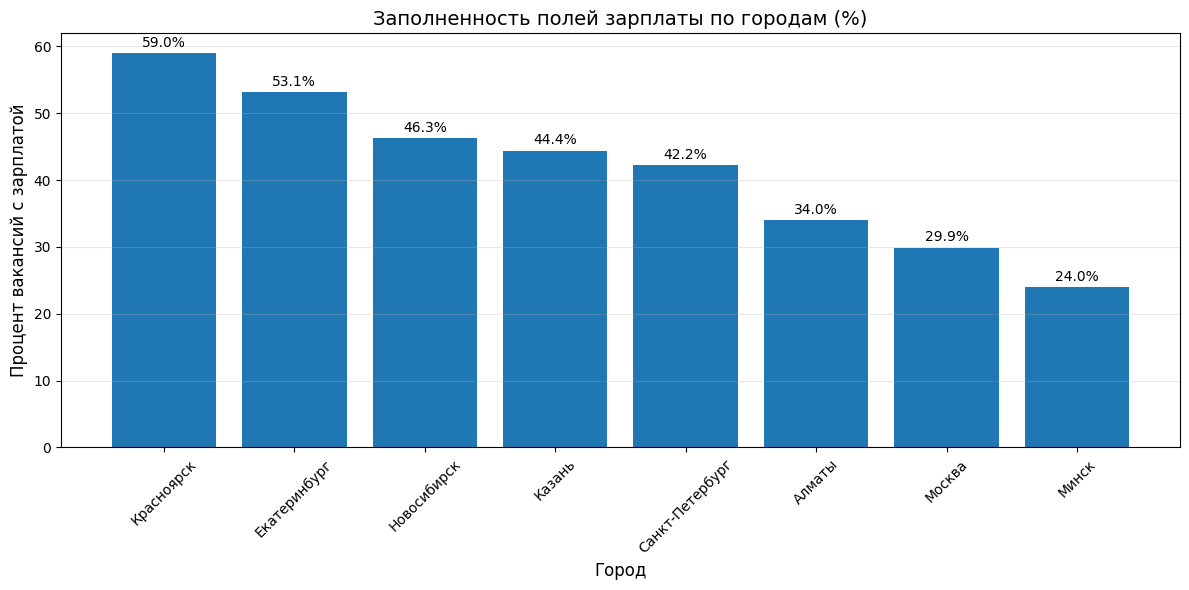

Заполненность полей зарплаты по городам:
              city  total_vacancies  with_salary_count  salary_percentage
0       Красноярск              847                500               59.0
1     Екатеринбург             1698                901               53.1
2      Новосибирск             2006                929               46.3
3           Казань             1415                628               44.4
4  Санкт-Петербург             2851               1203               42.2
5           Алматы             1892                643               34.0
6           Москва             5333               1592               29.9
7            Минск             2112                506               24.0


In [92]:
import matplotlib.pyplot as plt


df_salary_completeness = pd.read_sql_query(salary_completeness_query, connection)

# Визуализация
plt.figure(figsize=(12, 6))
bars = plt.bar(df_salary_completeness['city'], df_salary_completeness['salary_percentage'])
plt.title('Заполненность полей зарплаты по городам (%)', fontsize=14)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Процент вакансий с зарплатой', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bar, percentage in zip(bars, df_salary_completeness['salary_percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{percentage}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("Заполненность полей зарплаты по городам:")
print(df_salary_completeness)

## Исследование 2: Распределение типов трудоустройства для DS

Гипотеза: Для Data Scientist чаще предлагается полная занятость, чем частичная или проектная работа.

In [93]:
# Исследование 2: Распределение типов трудоустройства для DS
employment_ds_query = """
WITH ds_vacancies AS (
    SELECT
        employment,
        COUNT(*) as cnt,
        ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 1) as percentage
    FROM public.vacancies
    WHERE (
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%'
    )
    GROUP BY employment
)
SELECT * FROM ds_vacancies
ORDER BY cnt DESC;
"""


/tmp/ipython-input-1875458255.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employment_ds = pd.read_sql_query(employment_ds_query, connection)


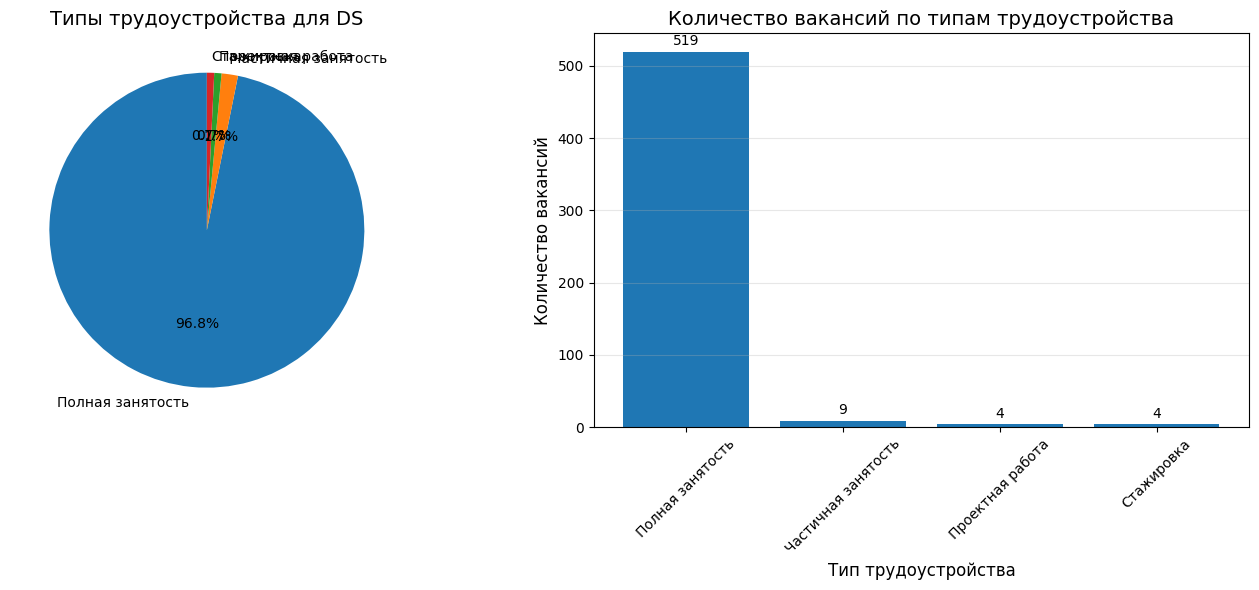

Распределение типов трудоустройства для DS:
            employment  cnt  percentage
0     Полная занятость  519        96.8
1  Частичная занятость    9         1.7
2     Проектная работа    4         0.7
3           Стажировка    4         0.7


In [94]:

df_employment_ds = pd.read_sql_query(employment_ds_query, connection)

# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Круговая диаграмма
ax1.pie(df_employment_ds['cnt'], labels=df_employment_ds['employment'],
        autopct='%1.1f%%', startangle=90)
ax1.set_title('Типы трудоустройства для DS', fontsize=14)

# Столбчатая диаграмма
bars = ax2.bar(df_employment_ds['employment'], df_employment_ds['cnt'])
ax2.set_title('Количество вакансий по типам трудоустройства', fontsize=14)
ax2.set_xlabel('Тип трудоустройства', fontsize=12)
ax2.set_ylabel('Количество вакансий', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Добавляем значения
for bar, cnt in zip(bars, df_employment_ds['cnt']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(cnt)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("Распределение типов трудоустройства для DS:")
print(df_employment_ds)

## Исследование 3: Сравнение средней зарплаты DS и всех вакансий по городам

Гипотеза: Data Scientist получают зарплату выше среднего по рынку IT.

In [95]:
# Исследование 3: Сравнение зарплат DS и всех вакансий
salary_comparison_query = """
WITH city_salaries AS (
    SELECT
        a.name as city,
        CASE
            WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL THEN (salary_from + salary_to) / 2.0
            ELSE COALESCE(salary_from, salary_to)
        END as calculated_salary,
        CASE
            WHEN (
                LOWER(v.name) LIKE '%data scientist%' OR
                LOWER(v.name) LIKE '%data science%' OR
                LOWER(v.name) LIKE '%исследователь данных%' OR
                (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') OR
                LOWER(v.name) LIKE '%machine learning%' OR
                LOWER(v.name) LIKE '%машинн%обучен%'
            ) THEN 'Data Scientist'
            ELSE 'Other IT'
        END as vacancy_type
    FROM public.vacancies v
    JOIN public.areas a ON v.area_id = a.id
    WHERE (salary_from IS NOT NULL OR salary_to IS NOT NULL)
    AND a.name IN ('Москва', 'Санкт-Петербург', 'Минск', 'Новосибирск')
),
aggregated AS (
    SELECT
        city,
        vacancy_type,
        COUNT(*) as sample_size,
        ROUND(AVG(calculated_salary)) as avg_salary,
        ROUND(PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY calculated_salary)) as median_salary
    FROM city_salaries
    GROUP BY city, vacancy_type
    HAVING COUNT(*) >= 10
)
SELECT * FROM aggregated
ORDER BY city, vacancy_type;
"""


/tmp/ipython-input-520634033.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salary_compare = pd.read_sql_query(salary_comparison_query, connection)


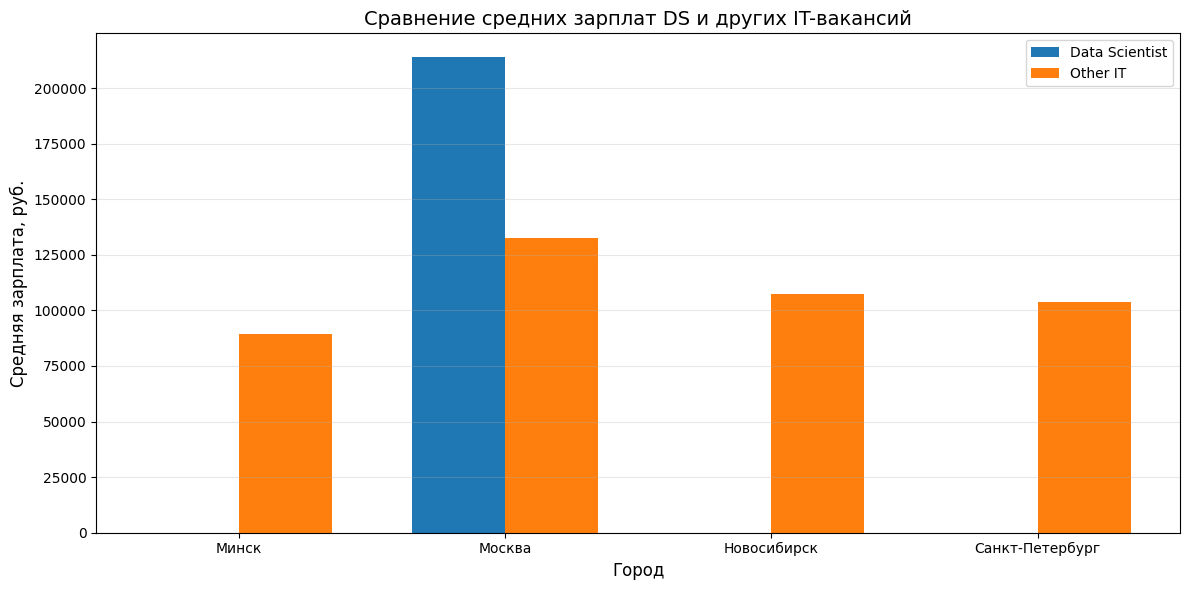

Сравнение зарплат Data Scientist и других IT-вакансий:
              city    vacancy_type  sample_size  avg_salary  median_salary
0            Минск        Other IT          504     89535.0        58448.0
1           Москва  Data Scientist           29    214000.0       200000.0
2           Москва        Other IT         1563    132658.0       110000.0
3      Новосибирск        Other IT          926    107587.0        80000.0
4  Санкт-Петербург        Other IT         1194    103816.0        80000.0


In [97]:
import numpy as np

df_salary_compare = pd.read_sql_query(salary_comparison_query, connection)

# Визуализация
plt.figure(figsize=(12, 6))

cities = df_salary_compare['city'].unique()
x = np.arange(len(cities))
width = 0.35

for i, vac_type in enumerate(['Data Scientist', 'Other IT']):
    type_data = df_salary_compare[df_salary_compare['vacancy_type'] == vac_type]
    salaries = [type_data[type_data['city'] == city]['avg_salary'].values[0]
                if city in type_data['city'].values else 0
                for city in cities]
    plt.bar(x + i*width, salaries, width, label=vac_type)

plt.title('Сравнение средних зарплат DS и других IT-вакансий', fontsize=14)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Средняя зарплата, руб.', fontsize=12)
plt.xticks(x + width/2, cities)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Сравнение зарплат Data Scientist и других IT-вакансий:")
print(df_salary_compare)

## Исследование 4: Анализ требований к опыту для DS с разными зарплатами

Гипотеза: Вакансии с высокой зарплатой требуют больше опыта работы.

In [98]:
# Исследование 4: Опыт работы и уровень зарплат для DS
experience_salary_query = """
WITH ds_vacancies AS (
    SELECT
        experience,
        CASE
            WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL THEN (salary_from + salary_to) / 2.0
            ELSE COALESCE(salary_from, salary_to)
        END as calculated_salary,
        CASE
            WHEN COALESCE(salary_to, salary_from) >= 300000 THEN 'High'
            WHEN COALESCE(salary_to, salary_from) >= 150000 THEN 'Medium'
            ELSE 'Low'
        END as salary_level
    FROM public.vacancies
    WHERE (
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%'
    )
    AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
)
SELECT
    salary_level,
    experience,
    COUNT(*) as vacancies_count,
    ROUND(AVG(calculated_salary)) as avg_salary
FROM ds_vacancies
GROUP BY salary_level, experience
HAVING COUNT(*) >= 5
ORDER BY
    CASE salary_level
        WHEN 'High' THEN 1
        WHEN 'Medium' THEN 2
        WHEN 'Low' THEN 3
    END,
    COUNT(*) DESC;
"""


/tmp/ipython-input-2319123964.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_exp_salary = pd.read_sql_query(experience_salary_query, connection)


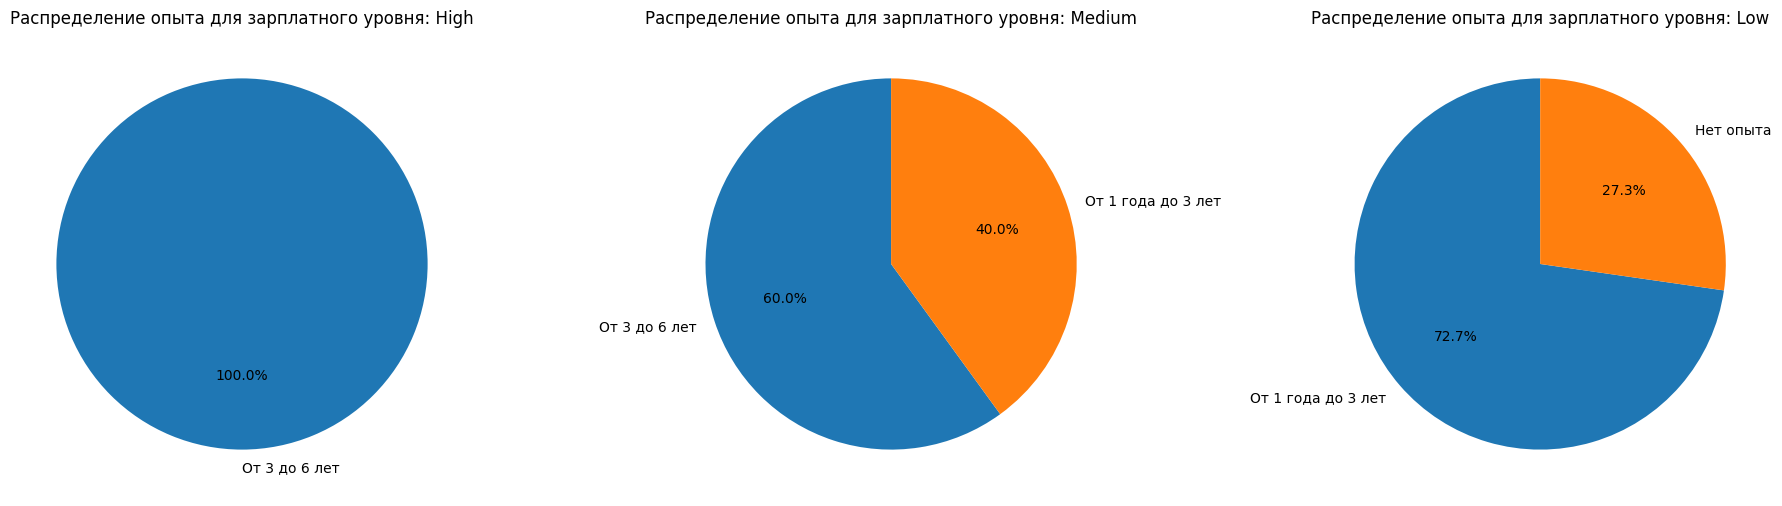

Распределение опыта работы по уровням зарплат:
salary_level        High  Low  Medium
experience                           
Нет опыта              0    6       0
От 1 года до 3 лет     0   16      14
От 3 до 6 лет         17    0      21


In [99]:

df_exp_salary = pd.read_sql_query(experience_salary_query, connection)

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

salary_levels = ['High', 'Medium', 'Low']
for idx, level in enumerate(salary_levels):
    level_data = df_exp_salary[df_exp_salary['salary_level'] == level]
    if not level_data.empty:
        ax = axes[idx]
        ax.pie(level_data['vacancies_count'], labels=level_data['experience'],
               autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Распределение опыта для зарплатного уровня: {level}', fontsize=12)

plt.tight_layout()
plt.show()

# Таблица с результатами
print("Распределение опыта работы по уровням зарплат:")
pivot_table = df_exp_salary.pivot_table(
    index='experience',
    columns='salary_level',
    values='vacancies_count',
    aggfunc='sum',
    fill_value=0
)
print(pivot_table)

## Исследование 5: Популярность графиков работы для разных уровней DS

Гипотеза: Senior Data Scientist чаще работают по гибкому графику, а Junior - по стандартному.

In [100]:
# Исследование 5: Графики работы для разных уровней DS
schedule_experience_query = """
WITH ds_vacancies AS (
    SELECT
        experience,
        schedule,
        COUNT(*) as cnt,
        ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY experience), 1) as percentage
    FROM public.vacancies
    WHERE (
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%'
    )
    AND experience IN ('Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет')
    AND schedule IS NOT NULL
    GROUP BY experience, schedule
)
SELECT * FROM ds_vacancies
ORDER BY
    CASE experience
        WHEN 'Нет опыта' THEN 1
        WHEN 'От 1 года до 3 лет' THEN 2
        WHEN 'От 3 до 6 лет' THEN 3
        WHEN 'Более 6 лет' THEN 4
    END,
    cnt DESC;
"""


/tmp/ipython-input-3026902837.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_schedule_exp = pd.read_sql_query(schedule_experience_query, connection)


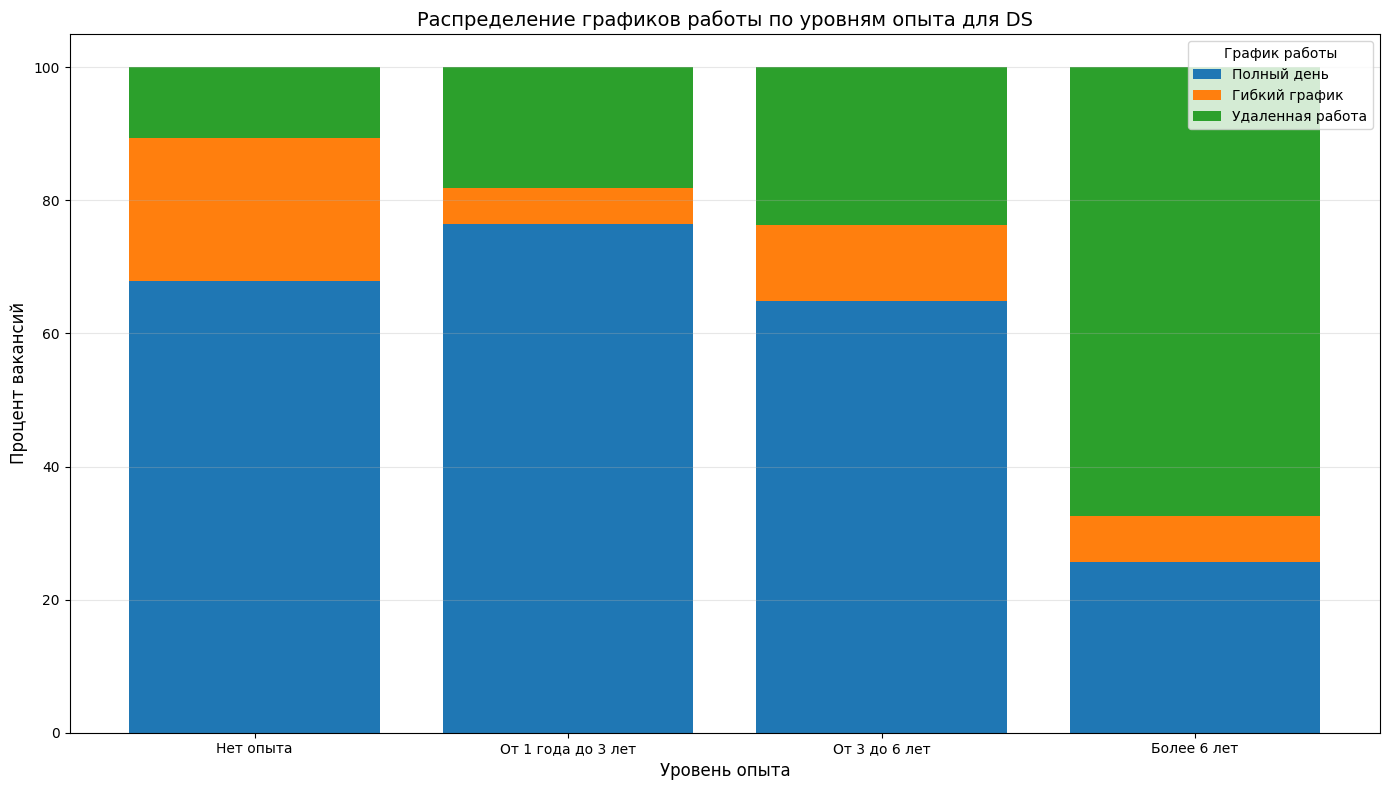

Распределение графиков работы по уровням опыта:
schedule            Гибкий график  Полный день  Удаленная работа
experience                                                      
Более 6 лет                   7.0         25.6              67.4
Нет опыта                    21.4         67.9              10.7
От 1 года до 3 лет            5.5         76.4              18.1
От 3 до 6 лет                11.4         64.9              23.7


In [101]:

df_schedule_exp = pd.read_sql_query(schedule_experience_query, connection)

# Визуализация
plt.figure(figsize=(14, 8))

experiences = df_schedule_exp['experience'].unique()
schedules = df_schedule_exp['schedule'].unique()

# Создаем stacked bar chart
bottom_values = np.zeros(len(experiences))

for schedule in schedules:
    schedule_data = df_schedule_exp[df_schedule_exp['schedule'] == schedule]
    values = [schedule_data[schedule_data['experience'] == exp]['percentage'].values[0]
              if exp in schedule_data['experience'].values else 0
              for exp in experiences]

    plt.bar(experiences, values, bottom=bottom_values, label=schedule)
    bottom_values += values

plt.title('Распределение графиков работы по уровням опыта для DS', fontsize=14)
plt.xlabel('Уровень опыта', fontsize=12)
plt.ylabel('Процент вакансий', fontsize=12)
plt.legend(title='График работы')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Распределение графиков работы по уровням опыта:")
pivot_schedule = df_schedule_exp.pivot_table(
    index='experience',
    columns='schedule',
    values='percentage',
    aggfunc='sum',
    fill_value=0
)
print(pivot_schedule)

## Исследование 6: Анализ компаний-лидеров по количеству DS-вакансий

Гипотеза: Крупные IT-компании публикуют больше всего вакансий для Data Scientist.

In [102]:
# Исследование 6: Топ компаний по количеству DS-вакансий
top_companies_ds_query = """
WITH ds_vacancies AS (
    SELECT
        e.name as company,
        COUNT(*) as ds_vacancies_count,
        ROUND(AVG(
            CASE
                WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL THEN (salary_from + salary_to) / 2.0
                ELSE COALESCE(salary_from, salary_to)
            END
        )) as avg_salary
    FROM public.vacancies v
    JOIN public.employers e ON v.employer_id = e.id
    WHERE (
        LOWER(v.name) LIKE '%data scientist%' OR
        LOWER(v.name) LIKE '%data science%' OR
        LOWER(v.name) LIKE '%исследователь данных%' OR
        (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') OR
        LOWER(v.name) LIKE '%machine learning%' OR
        LOWER(v.name) LIKE '%машинн%обучен%'
    )
    GROUP BY e.id, e.name
    HAVING COUNT(*) >= 5
)
SELECT
    company,
    ds_vacancies_count,
    avg_salary,
    ROUND(ds_vacancies_count * 100.0 / SUM(ds_vacancies_count) OVER (), 1) as market_share
FROM ds_vacancies
ORDER BY ds_vacancies_count DESC
LIMIT 15;
"""


/tmp/ipython-input-729981567.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_companies = pd.read_sql_query(top_companies_ds_query, connection)


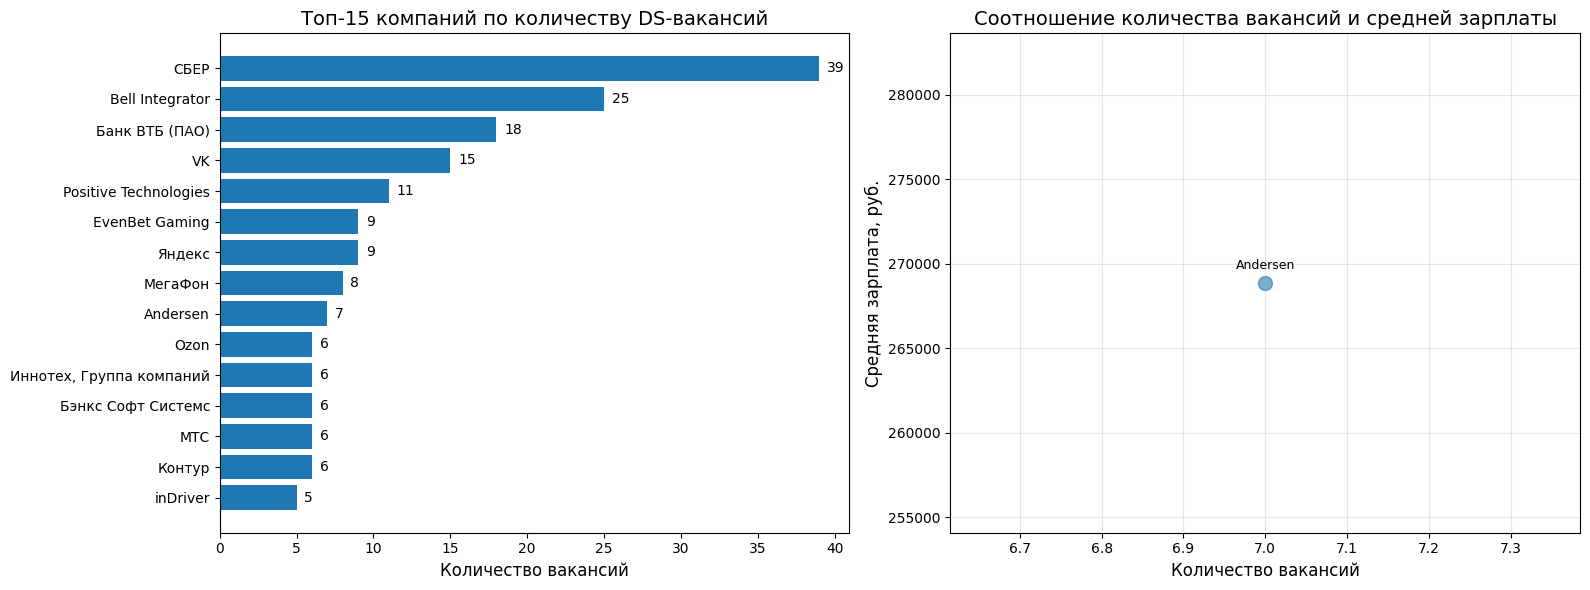

Топ компаний по количеству DS-вакансий:
                     company  ds_vacancies_count  avg_salary  market_share
0                       СБЕР                  39         NaN          19.4
1            Bell Integrator                  25         NaN          12.4
2             Банк ВТБ (ПАО)                  18         NaN           9.0
3                         VK                  15         NaN           7.5
4      Positive Technologies                  11         NaN           5.5
5             EvenBet Gaming                   9         NaN           4.5
6                     Яндекс                   9         NaN           4.5
7                    МегаФон                   8         NaN           4.0
8                   Andersen                   7    268863.0           3.5
9                       Ozon                   6         NaN           3.0
10  Иннотех, Группа компаний                   6         NaN           3.0
11        Бэнкс Софт Системс                   6         NaN

In [103]:

df_top_companies = pd.read_sql_query(top_companies_ds_query, connection)

# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Топ компаний по количеству вакансий
ax1.barh(df_top_companies['company'], df_top_companies['ds_vacancies_count'])
ax1.set_title('Топ-15 компаний по количеству DS-вакансий', fontsize=14)
ax1.set_xlabel('Количество вакансий', fontsize=12)
ax1.invert_yaxis()  # Наверху самые большие значения

# Добавляем значения
for i, (company, count) in enumerate(zip(df_top_companies['company'], df_top_companies['ds_vacancies_count'])):
    ax1.text(count + 0.5, i, f'{count}', va='center', fontsize=10)

# Соотношение зарплаты и количества вакансий
scatter = ax2.scatter(df_top_companies['ds_vacancies_count'],
                     df_top_companies['avg_salary'],
                     s=100, alpha=0.6)

ax2.set_title('Соотношение количества вакансий и средней зарплаты', fontsize=14)
ax2.set_xlabel('Количество вакансий', fontsize=12)
ax2.set_ylabel('Средняя зарплата, руб.', fontsize=12)
ax2.grid(True, alpha=0.3)

# Добавляем подписи для некоторых точек
for i, row in df_top_companies.iterrows():
    if row['ds_vacancies_count'] > 10 or row['avg_salary'] > 250000:
        ax2.annotate(row['company'][:15],
                    (row['ds_vacancies_count'], row['avg_salary']),
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("Топ компаний по количеству DS-вакансий:")
print(df_top_companies[['company', 'ds_vacancies_count', 'avg_salary', 'market_share']])

In [104]:
connection.close()
print("Соединение с базой данных закрыто.")

Соединение с базой данных закрыто.


## Общие выводы по дополнительным исследованиям

Проведённые дополнительные исследования выявили несколько ключевых парадоксов рынка: несмотря на максимальное количество вакансий в Москве, именно здесь наблюдается наименьшая прозрачность условий оплаты - зарплату указывают лишь в 30% случаев, тогда как в регионах вроде Красноярска и Екатеринбурга этот показатель достигает 53-59%. При этом Data Scientist в Москве получают в среднем 214 тысяч рублей, что на 61% выше, чем другие IT-специалисты в столице, подтверждая исключительную ценность профессии. Интересно, что высокие зарплаты (категория High) доступны только специалистам с опытом от 3 лет, а начинающим предлагаются исключительно низкие позиции, что создаёт жёсткий карьерный лифт. Формат работы также сильно зависит от уровня: если Junior в 68% случаев работают в офисе на полном дне, то Senior-специалисты в 67% случаев выбирают удалённый формат, что демонстрирует эволюцию от контроля к автономии. Лидером по количеству DS-вакансий оказался СБЕР с 19% рынка, однако у большинства топ-работодателей зарплата не указана, что может свидетельствовать либо о непубличных вилках, либо о переговорном характере оплаты. Эти данные показывают, что рынок Data Scientist в России характеризуется высокой концентрацией в столицах при недостаточной прозрачности, чёткими карьерными ступенями и растущим спросом на удалённые форматы для опытных специалистов, при этом банковский сектор и IT-аутсорсинг формируют основной спрос на таких специалистов.